In [1]:
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo

# Watershed transform

## Principles

As introduced before, the main idea behind the watershed transform is to isolate regions of the image similarily to hydrographic region in geography. An image can indeed be seen as a 2D and a half data, the gray levels being considered the altitude. If the gradient of an image is looked upon, the borders of the objects correspond to the crests of the gradient surface.
|Example of a hydrographic map|
|:-:|
|<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Amazonriverbasin_basemap.png" alt="Example of a hydrographic map" title="Example of a hydrographic map" width="300"/>|

## Gradient crests

The crests of the map are computed by a simple gradient operator.

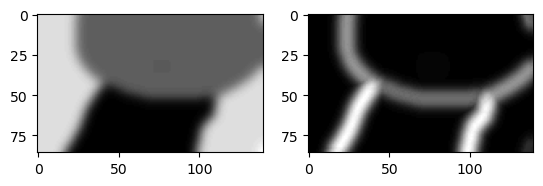

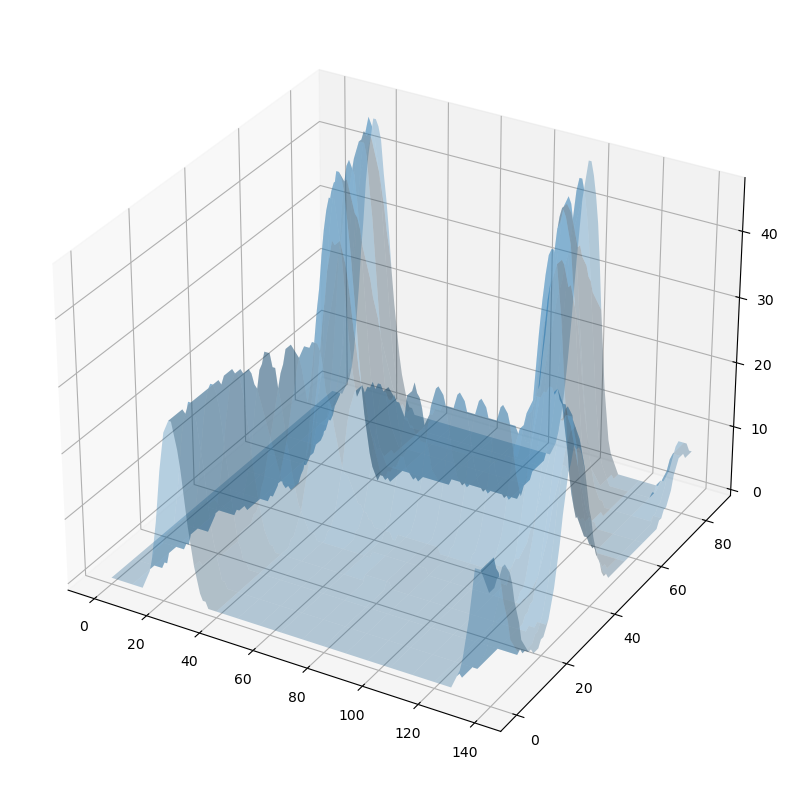

In [7]:
from skimage.io import imread
import numpy as np
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.measure import label
from skimage.morphology import disk
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import watershed,mark_boundaries
from mpl_toolkits.mplot3d import axes3d, Axes3D

ima = imread('../data/ws2.png')[:,:,0]
gradient = skr.gradient(ima,disk(5))

plt.subplot(1,2,1)
plt.imshow(ima,cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(gradient,cmap=plt.cm.gray)

m,n = gradient.shape

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection='3d')
X,Y = np.meshgrid(range(n),range(m))
Z = gradient

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3);

## Local minima

The local minima are extracted from the gradient previously computed.

Text(0.5, 1.0, 'Labels')

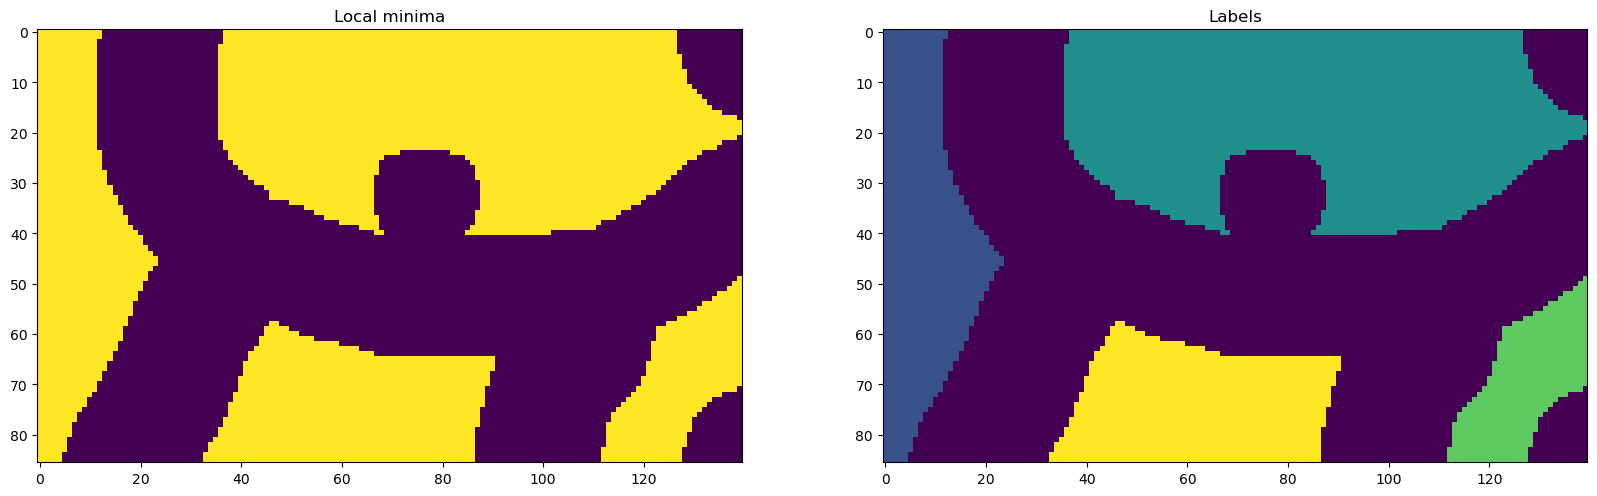

In [25]:
local_min = gradient <= skr.minimum(gradient,disk(10))
marks = label(local_min,background=0)

fig = plt.figure(figsize=[20,10])
ax1 = plt.subplot(121);
plt.imshow(local_min);
plt.title("Local minima")
ax2 = plt.subplot(122);
plt.imshow(marks);
plt.title("Labels")

## Watershed basins 

One watershed basin is assigned for each minimum that has been labeled before.

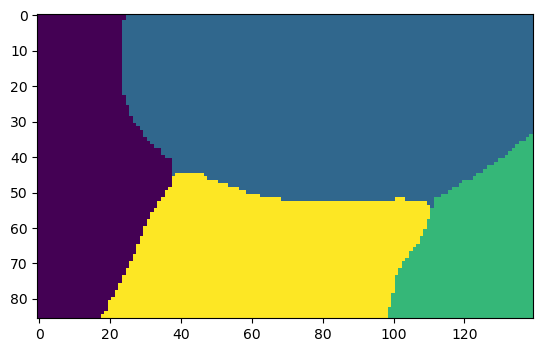

In [12]:
ws = watershed(gradient,marks)
plt.figure()
plt.imshow(ws);

## Basins borders overlay 

The borders are then automatically computed and aligned with the borders of the objects of the original image.

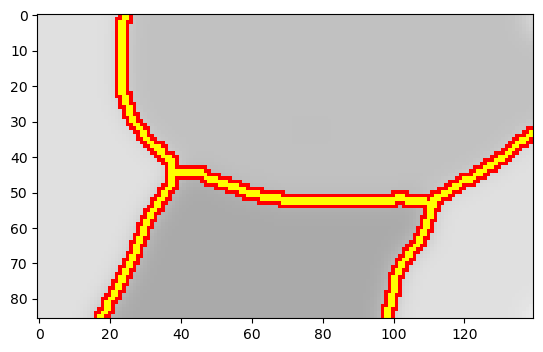

In [26]:
result = mark_boundaries(ima,ws,outline_color=[1,0,0])

plt.figure()
plt.imshow(result);

## Pros and cons

The watershed algorithm identifies each local basin starting from each local minimum of the image. Each time two adjacent basins are merging, a virtual dam is added between the two basins in order to keep them separated. When the image is completely flooded, the top of the dams is the result of the watershed transform ; in other words, the watershed segmentation is the split of the image into its basins. Here is the list of pros and cons of the watershed method.
- Advantages :
    - extreme sensitivity to borders,
    - production of closed borders (in fact it produces regions).
- Limitations :
    - potential production of a lot of regions (one for each local minimum),
    - potential over-segmentation.
- Solutions to limit over-segmentation :
    - pre-filtering,
    - using marked watershed (see example below),
    - merging adjacent basins having similar gray level,
    - ...

## Touching objects separation

It is a classical problem to split touching objects in an image. The code below compares the method of the EDT and the watershed method.

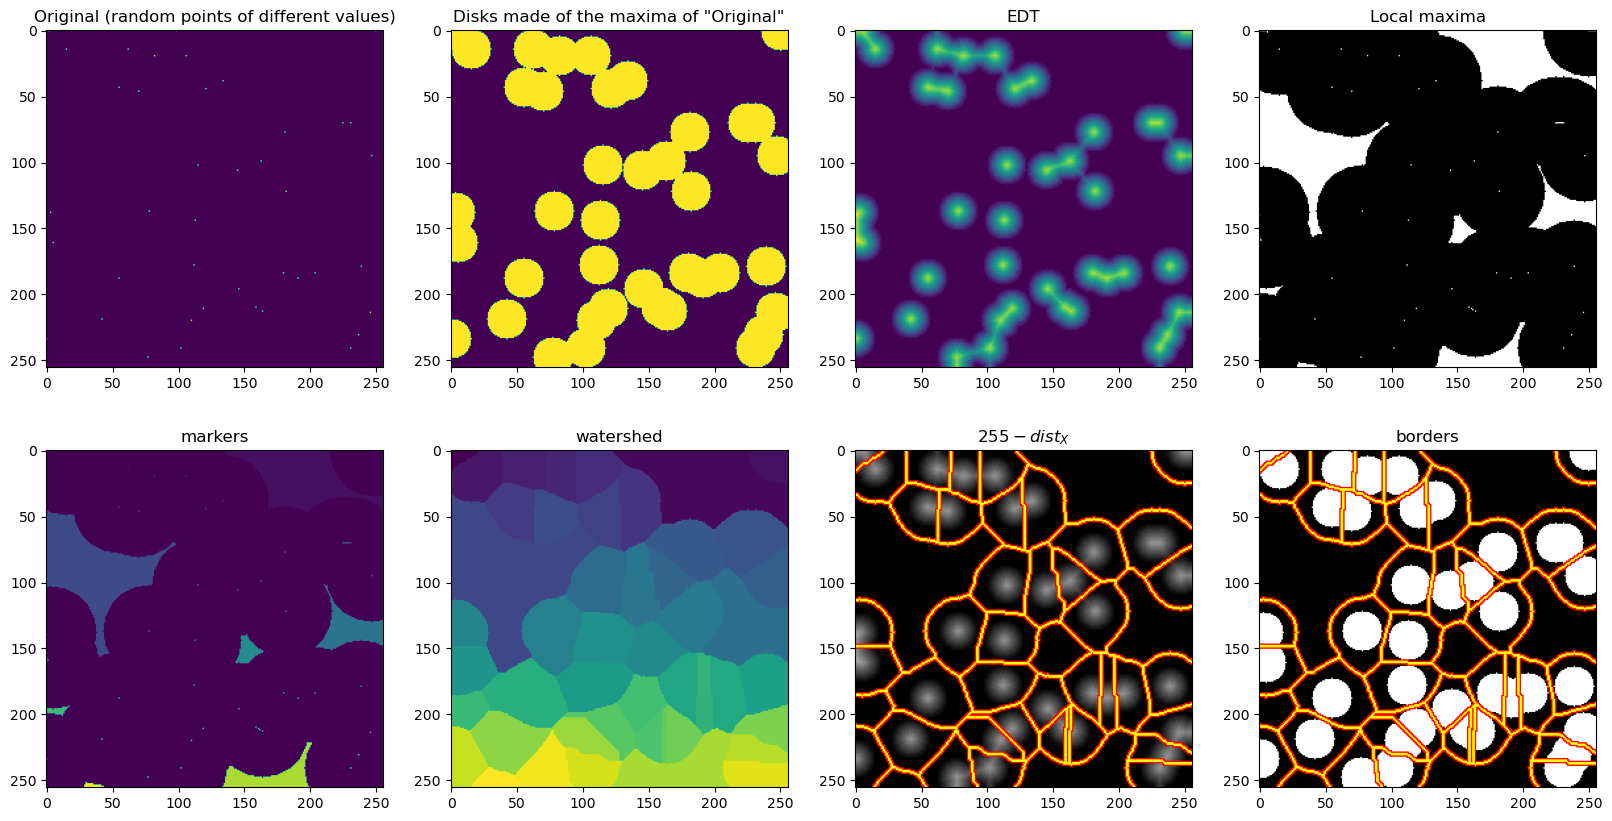

In [41]:
import numpy as np
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.measure import label
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import watershed,mark_boundaries

np.random.seed(1)
n = (np.random.random((256,256))<.0005).astype(np.uint8)
d = skr.maximum(n,disk(15))

distance = ndi.distance_transform_edt(d).astype(np.uint8)
local_max = (distance == skr.maximum(distance,disk(20))).astype(np.uint8)
marks = label(local_max,background=0)

ws = watershed(255-distance,marks)

result = mark_boundaries(d*255,ws,outline_color=[1,0,0])
result2 = mark_boundaries(10*distance,ws,outline_color=[1,0,0])

plt.figure(figsize=[20,10])
plt.subplot(2,4,1)
plt.imshow(n)
plt.title('Original (random points of different values)')
plt.subplot(2,4,2)
plt.imshow(d)
plt.title('Disks made of the maxima of "Original"')
plt.subplot(2,4,3)
plt.imshow(distance)
plt.title('EDT')
plt.subplot(2,4,4)
plt.imshow(local_max,cmap=plt.cm.gray)
plt.title('Local maxima')
plt.subplot(2,4,5)
plt.imshow(marks)
plt.title('markers')
plt.subplot(2,4,6)
plt.imshow(ws)
plt.title('watershed')
plt.subplot(2,4,7)
plt.imshow(result2)
plt.title('$255-dist_X$')
plt.subplot(2,4,8)
plt.imshow(result)
plt.title('borders');

## Cell segmentation example

Here is an example of a segmentation for low contrast objects like cells.

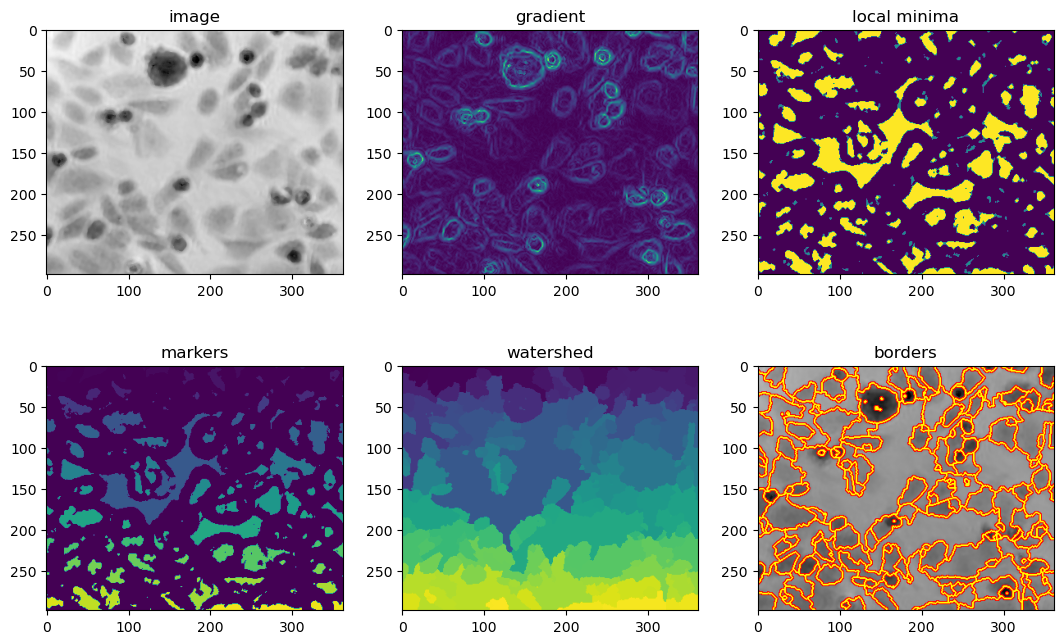

In [42]:
import numpy as np
from scipy import ndimage

ima = imread('../data/cells.tif')

#filtered version
lp = skr.median(ima,disk(5))
lp = ima
grad = skr.gradient(lp,disk(1))
mark = (skr.minimum(ima,disk(10))+10 >= ima).astype(np.uint8)

pp_mark = skr.maximum(skr.minimum(mark,disk(2)),disk(2))

lab = label(mark,background=0)
ws = watershed(grad,lab)

result = mark_boundaries(ima,ws,outline_color=[1,0,0])

plt.figure(figsize=[13,8])
plt.subplot(2,3,1)
plt.imshow(ima,cmap=plt.cm.gray)
plt.title('image')
plt.subplot(2,3,2)
plt.imshow(grad)
plt.title('gradient')
plt.subplot(2,3,3)
plt.imshow(pp_mark+mark)
plt.title('local minima')
plt.subplot(2,3,4)
plt.imshow(lab)
plt.title('markers')
plt.subplot(2,3,5)
plt.imshow(ws)
plt.title('watershed')
plt.subplot(2,3,6)
plt.imshow(result)
plt.title('borders');


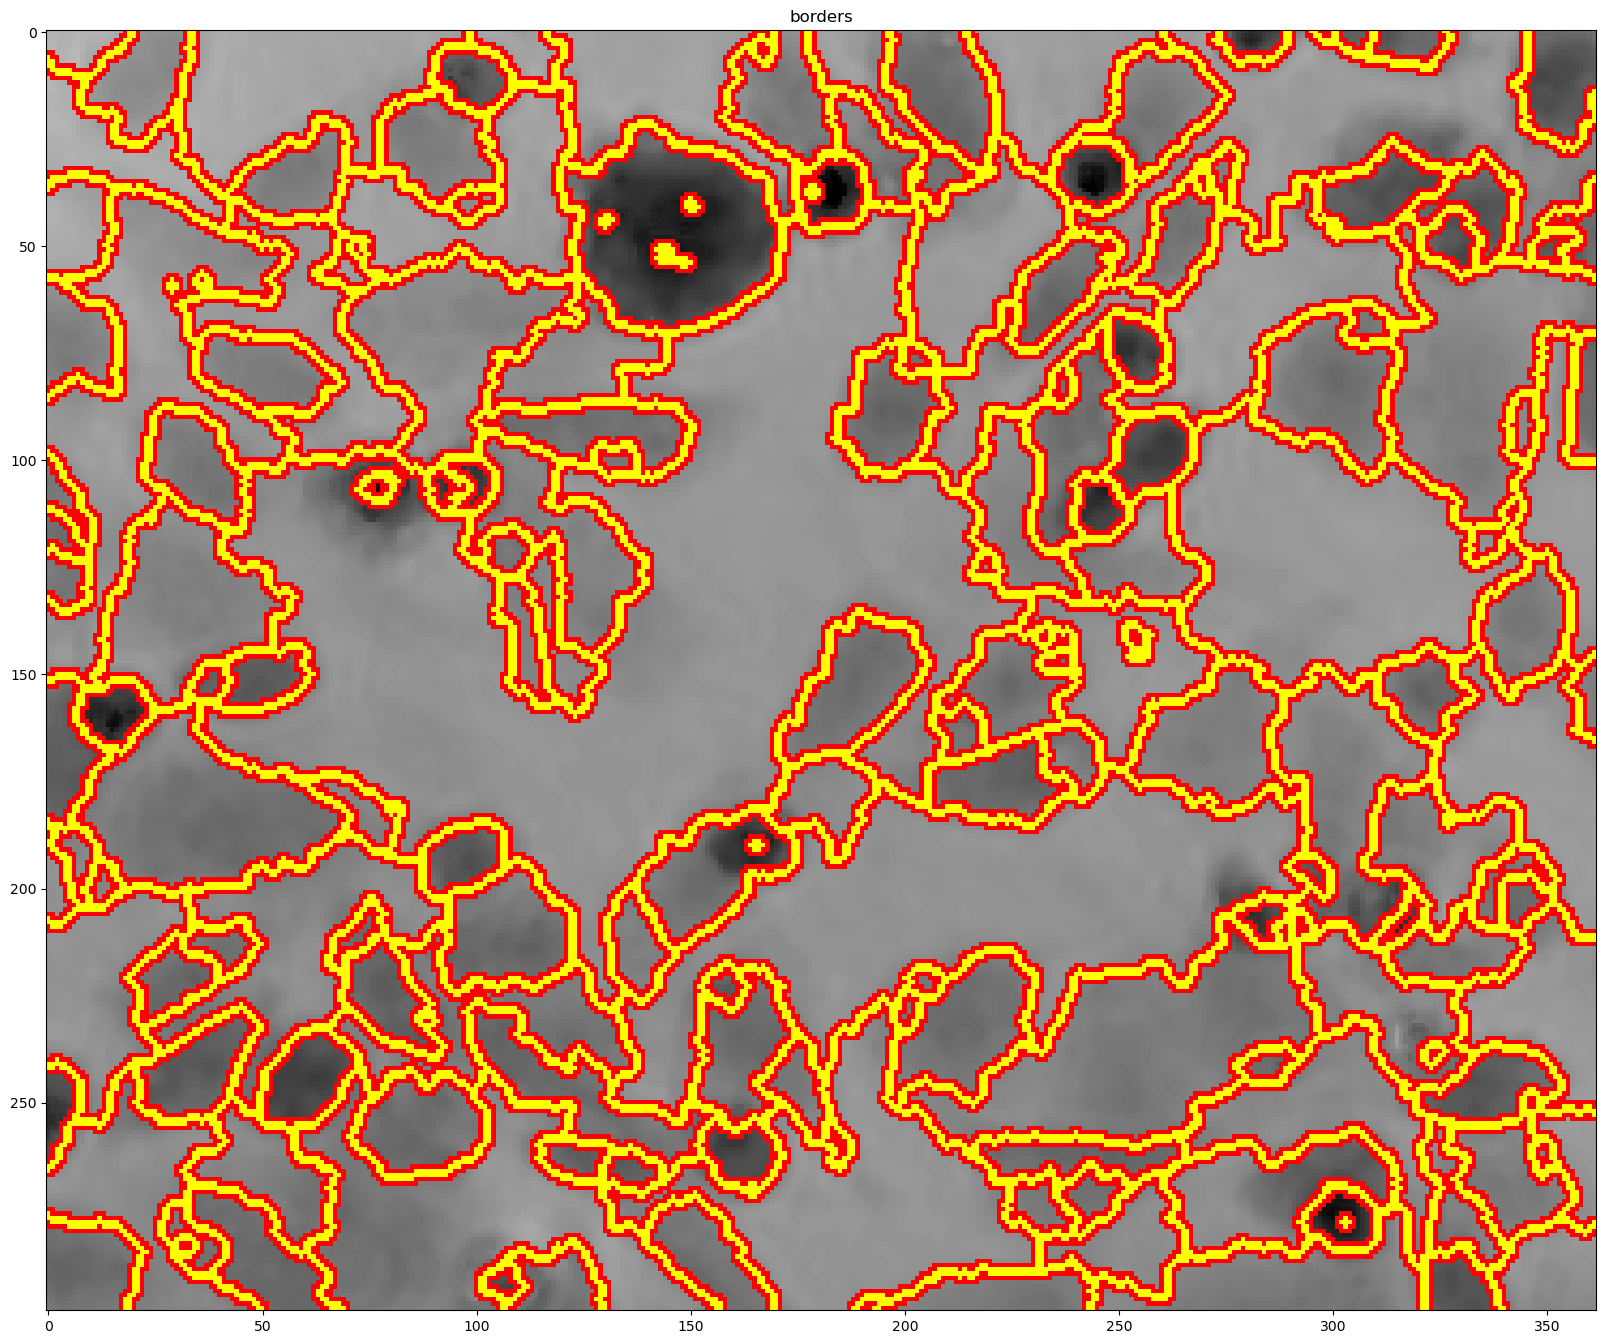

In [43]:
plt.figure(figsize=[20,20])
plt.imshow(result)
plt.title('borders');